# Handwritten Digit Recognition with CNN

*@masahiro rikiso, 170206*

---

open this notebook by typing the following command in terminal:

```
$ jupyter nbextension enable --py widgetsnbextension
$ jupyter notebook
```

## 1) Preparation

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

## 2) Load Mnist (Handwritten Digit)

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [78]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# print (X_train[0])

In [7]:
from matplotlib import pyplot as plt

In [8]:
%matplotlib inline
from ipywidgets import interact

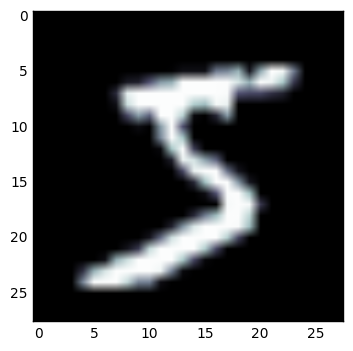

In [81]:
@interact(i=(0,10))
def plot(i=0):
    plt.imshow(X_train[i], cmap='bone')
    plt.show()

## 3) Create and Train Convolutional Neural Network(CNN)

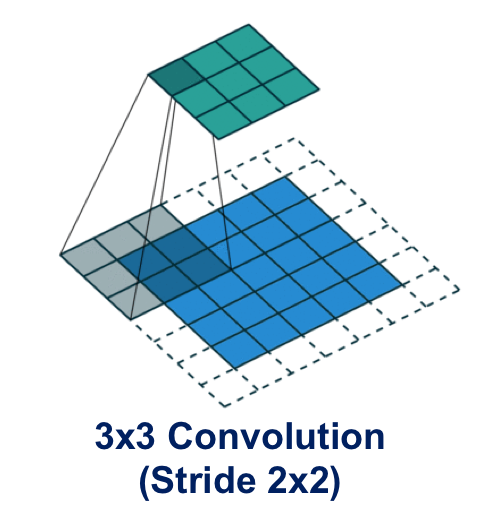

In [10]:
from IPython.display import Image
Image("conv.png", width=250)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
#from keras.callbacks import TensorBoard

In [12]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [13]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [14]:
batch_size = 128
#nb_epoch = 20
nb_epoch = 1

model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()
          
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

          #tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True)

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test)
#                    ,callbacks=[tb]
                   )
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 26, 26, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 24, 24, 32)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 24, 24, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

## 4) Test CNN model with unseen data

In [15]:
X_test[0].shape

(28, 28, 1)

In [16]:
test_ = X_test[0].reshape(28,28)
test_.shape

(28, 28)

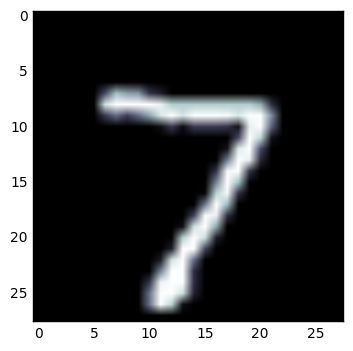

In [17]:
plt.imshow(test_, cmap='bone')

In [18]:
model.predict_classes(X_test[0].reshape(1,28,28,1))

1/1 [==============================] - 0s


array([7])

## 5) Visualize model

In [19]:
from keras.utils.visualize_util import plot
plot(model, to_file="model_cnn.png", show_shapes=True, show_layer_names=True)

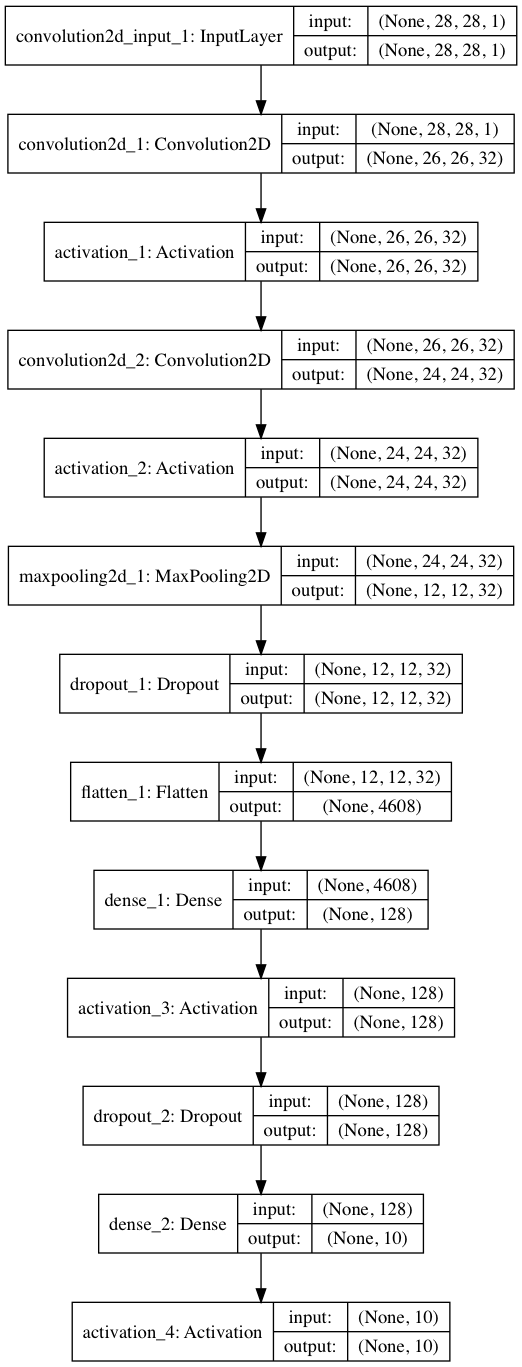

In [20]:
from IPython.display import Image
Image("model_cnn.png", width=400)

## 6) Visualize the filter of the convolution layer

In [21]:
model.layers

In [22]:
type(model.layers[0].get_weights())

list

In [23]:
type(model.layers[0].get_weights()[0])

numpy.ndarray

In [24]:
w1 = model.layers[0].get_weights()[0]
w1.shape

(3, 3, 1, 32)

## 1st layer's weight

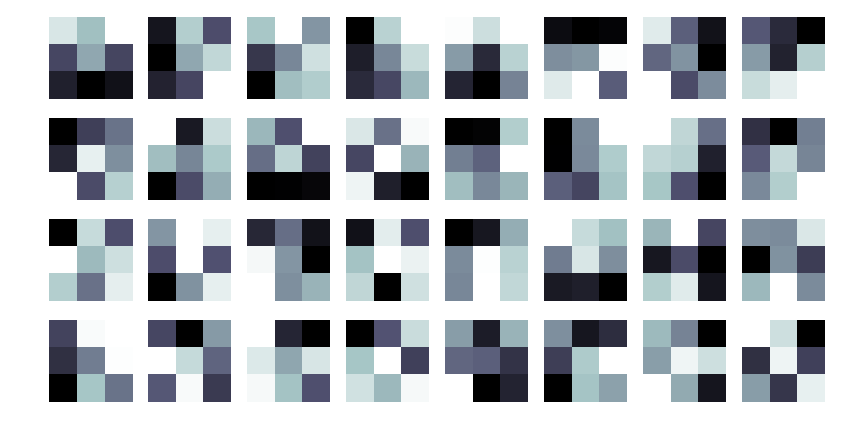

In [25]:
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        w1_ = w1[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(w1_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()

## 2nd layer's weight

In [26]:
model.layers

In [27]:
w2 = model.layers[2].get_weights()[0]
w2.shape

(3, 3, 32, 32)

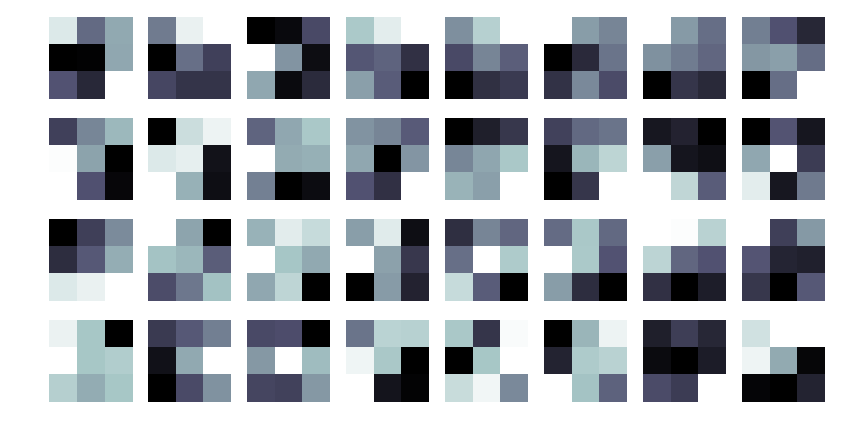

In [28]:
@interact(channel=(0,31))
def plot_w2(channel=5):
    fig, ax = plt.subplots(nrows=4,ncols=8)
    fig.set_size_inches((10,5))
    for i in range(4):
        for j in range(8):
            w2_ = w2[:,:,channel,i*8+j].squeeze()
            ax[i][j].imshow(w2_,cmap="bone",interpolation="nearest")
            ax[i][j].set_axis_off()

## 7) Visualize the output of the convolution layer

In [61]:
from keras import backend as K

## !choose input image!

In [70]:
test_img = X_test[4].reshape(-1,28,28,1)

## 1st conv

In [71]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = get_layer_output([test_img])[0]

(1, 26, 26, 32)


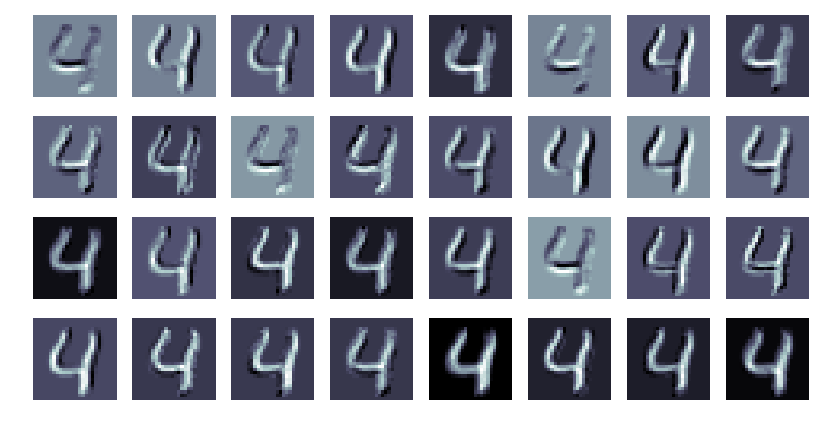

In [72]:
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        out_ = layer_output[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()
print (layer_output.shape)

## 1st activation

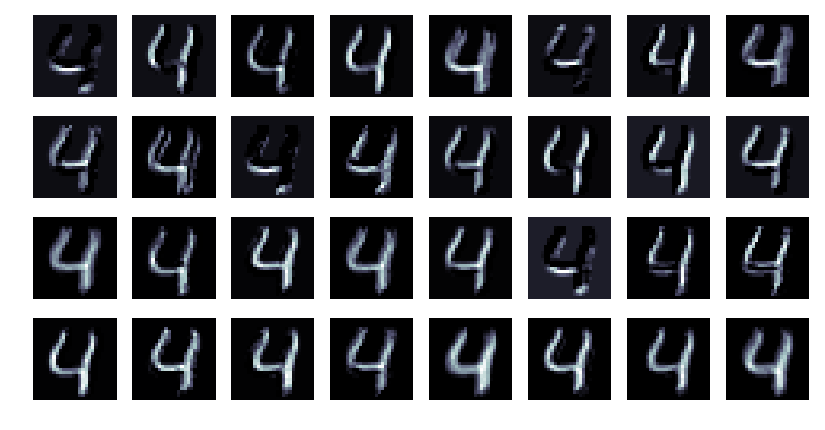

In [73]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_layer_output([test_img])[0]
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        out_ = layer_output[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()

## 2nd conv

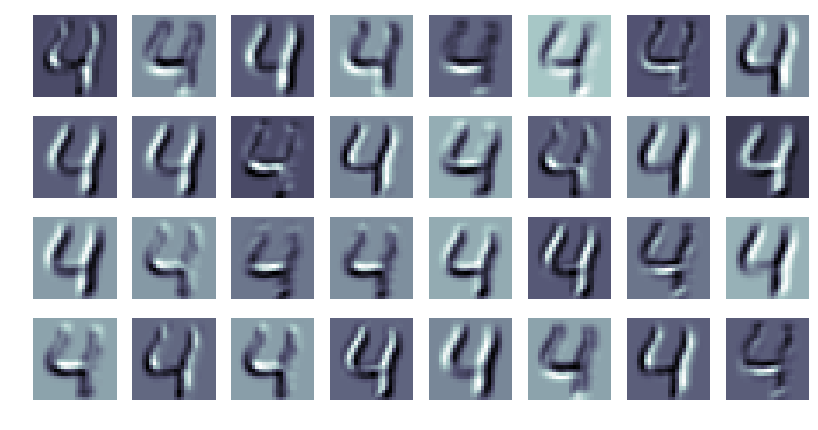

In [74]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_layer_output([test_img])[0]
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        out_ = layer_output[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()

## 2nd activation

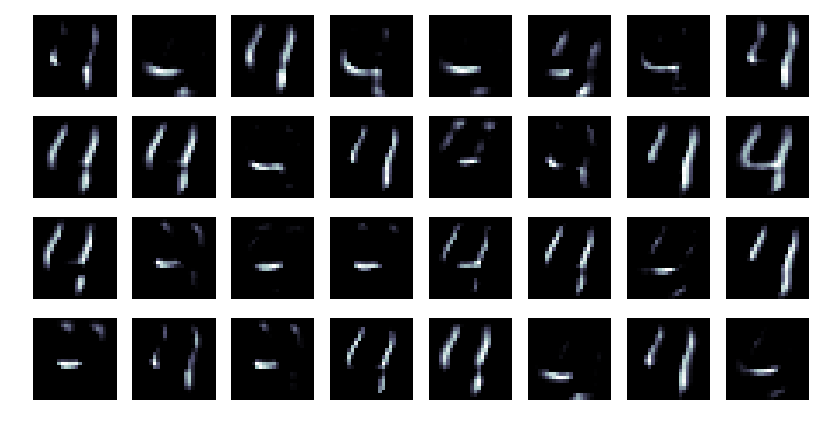

In [75]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
layer_output = get_layer_output([test_img])[0]
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        out_ = layer_output[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()

## max pooling

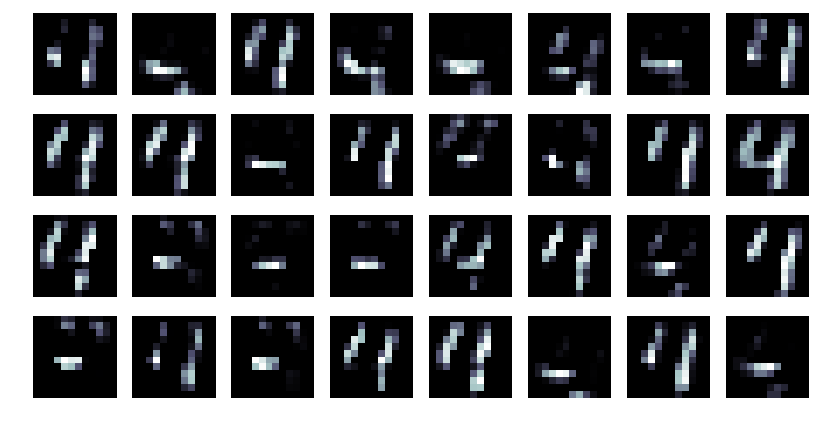

In [76]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layer_output = get_layer_output([test_img])[0]
fig, ax = plt.subplots(nrows=4,ncols=8)
fig.set_size_inches((10,5))
for i in range(4):
    for j in range(8):
        out_ = layer_output[:,:,:,i*8+j].squeeze()
        ax[i][j].imshow(out_,cmap="bone",interpolation="nearest")
        ax[i][j].set_axis_off()